# Data Science analysis using python

## Name: Dhanush Kobal
## Dataset: Heart failure clinical records
 
### Today I will be exploring the heart failure clincial data records.
### The goal is to predict any DEATH EVENT given alot of features.

### This is a classification problem, and we will explore various ML techinuqes 

<h1>Data preprocessing</h1>

### We will first get a general idea of how the data looks like

In [1]:
# https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
import pandas as pd
import matplotlib.pyplot as plt
kaggle_data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

#kaggle_data.head()

index = range(1, kaggle_data.shape[0]+1)
kaggle_data['id'] = index
kaggle_data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,id
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0,295
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0,296
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0,297
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0,298
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0,299


### Now we will see if there are any missing values. From the plot, we see that there are no missing values

In [2]:
kaggle_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
id                          0
dtype: int64

### Now the goal is to see what values are categorical and what values ar numeric. From this plot, we see that DEATH_EVENT, anaemia, diabetes, high_blood_pressure, sex, and smoking are all categocial varibales

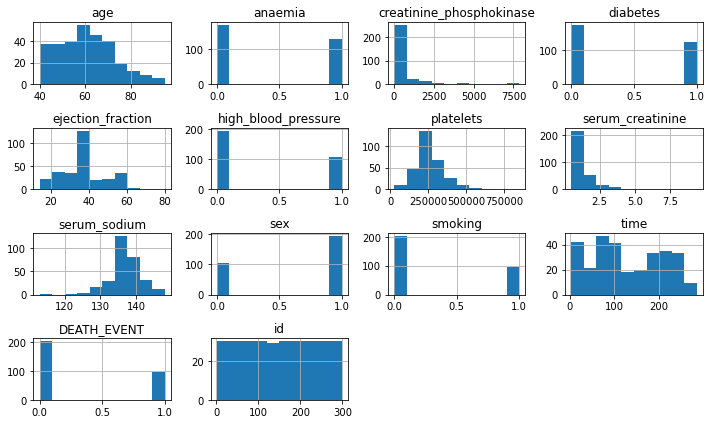

In [3]:
kaggle_data.hist(figsize=(10 ,6))
plt.tight_layout()

In [4]:
factors = ['DEATH_EVENT' , 'anaemia' , 'diabetes', 'high_blood_pressure',
            'sex', 'smoking']
kaggle_data[factors] = kaggle_data[factors].astype(object)
kaggle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    object 
 13  id                        299 non-null    int64  
dtypes: float64

In [5]:
from sklearn.model_selection import train_test_split
X = kaggle_data.loc[:, ~kaggle_data.columns.isin(['DEATH_EVENT'])]
y = kaggle_data.loc[:, kaggle_data.columns=='DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                                    test_size=0.30, 
                                                    random_state=42, 
                                                    stratify= y)

## Data imbalances

In [6]:
print('Proportion of people that lived in train data' , y_train['DEATH_EVENT'].sum()/y_train['DEATH_EVENT'].count())
print('Proportion of people that lived in test data' , y_test['DEATH_EVENT'].sum()/y_test['DEATH_EVENT'].count())

Proportion of people that lived in train data 0.32057416267942584
Proportion of people that lived in test data 0.32222222222222224


## Data representation

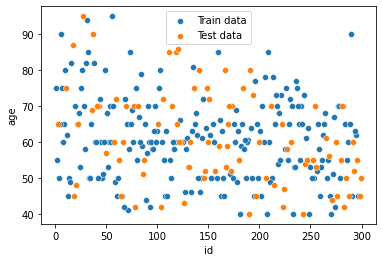

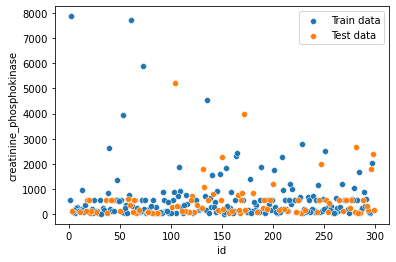

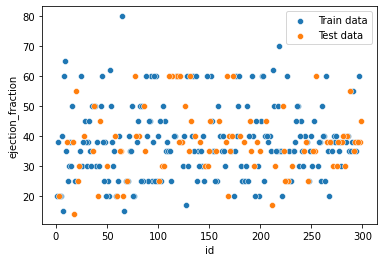

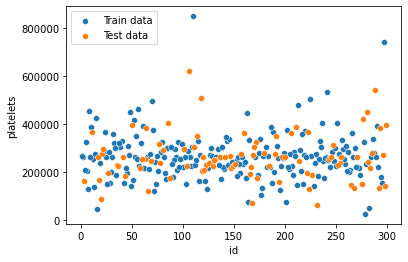

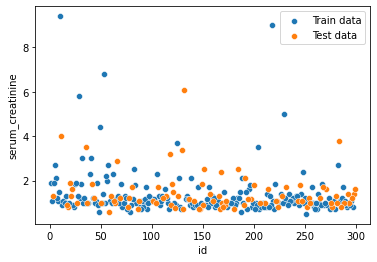

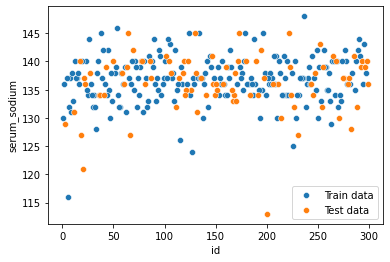

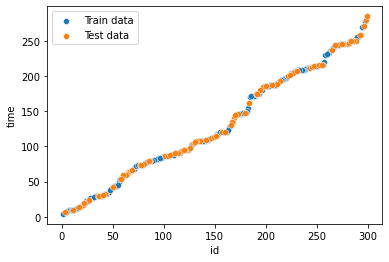

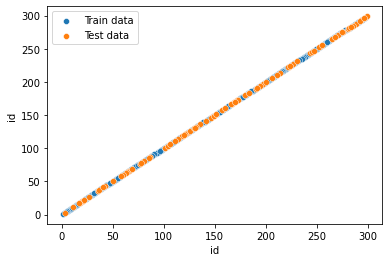

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 

for col in X_train.select_dtypes(['float64', 'int64']).columns:
    plt.figure()
    sns.scatterplot(x = 'id' , y = col, data = X_train)
    sns.scatterplot(x = 'id' , y = col, data = X_test)
    plt.legend(labels=['Train data', 'Test data'])

In [8]:
def plot_scatter(var):
    import numpy as np
    features = X_train.loc[:, X_train.columns != var].columns[0:11]
    sns.pairplot(data = X_train,
            y_vars = var,
            x_vars= features)
    plt.figure()
    sns.boxplot(y = X_train[var] , x = y_train['DEATH_EVENT'], hue= y_train['DEATH_EVENT'], palette="Set3")
    sns.stripplot(x= y_train['DEATH_EVENT'] , y= X_train[var], size=4, color=".3", linewidth=0)
    plt.grid()
    
    for i in X_train.select_dtypes('object'):
        plt.figure()
        sns.histplot(x = X_train[var], hue= X_train[i] ,data = X_train, element="step", kde=True)

## Feature engineering: Age

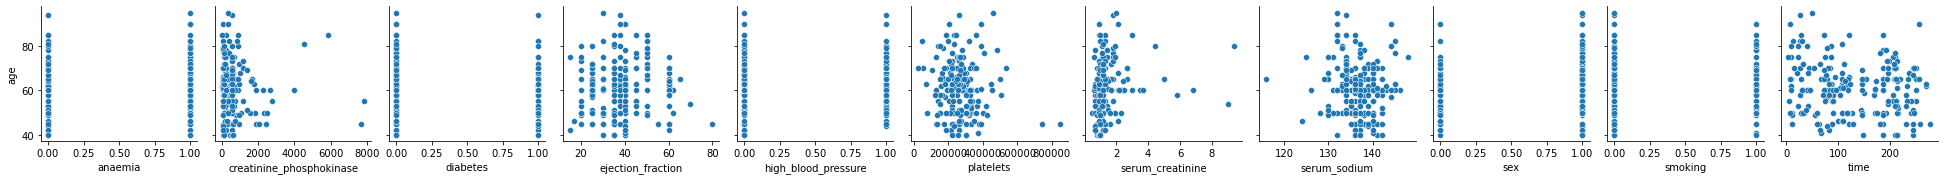

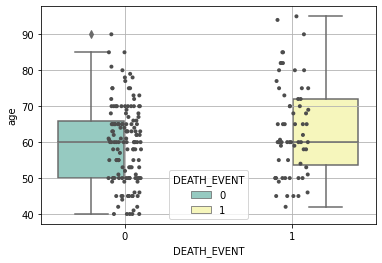

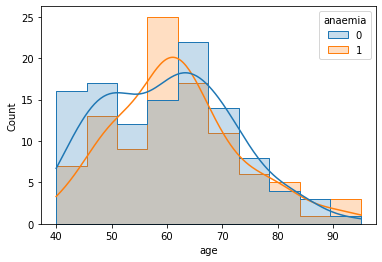

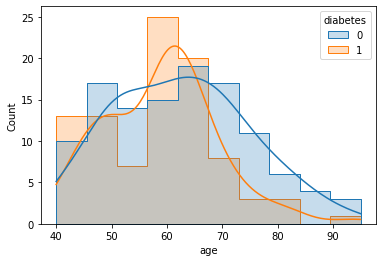

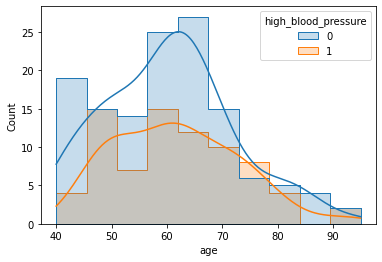

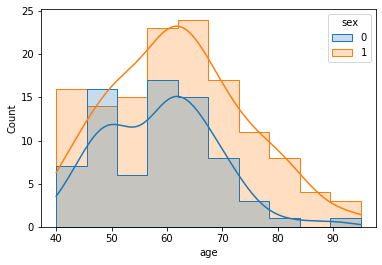

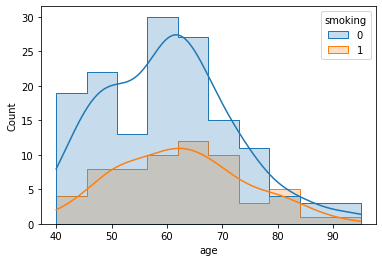

In [9]:
plot_scatter('age')

<AxesSubplot:>

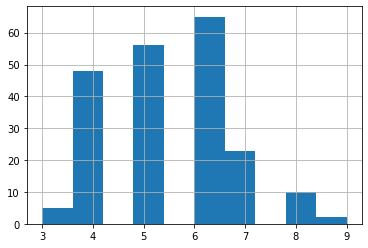

In [10]:
import numpy as np
pd.options.mode.chained_assignment = None
X_train['age_cat'] = pd.cut(X_train.age, bins = list(range(0,int(max(X_train.age)),10)) + [np.inf],
                           labels = list(range(0,10,1)))

X_test['age_cat'] = pd.cut(X_test.age, bins = list(range(0,int(max(X_test.age)),10)) + [np.inf],
                          labels = list(range(0,10,1)))

X_train['age_cat'].hist() 
# we see that the age_cat all has good proportions

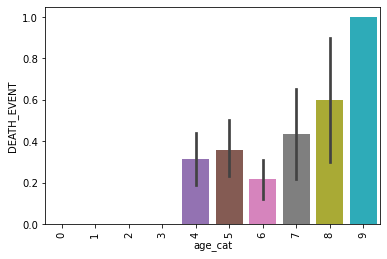

In [11]:
sns.barplot(x = X_train['age_cat'], y = y_train['DEATH_EVENT'])
plt.xticks(rotation=90)


X_train['age_death_event'] = pd.cut(X_train.age , bins = [0,40,80,np.inf], labels = [1,2,3]).astype('object')
X_test['age_death_event'] = pd.cut(X_test.age , bins = [0,40,80,np.inf], labels = [1,2,3]).astype('object')

In [12]:
X_train['log_age'] = np.log(X_train['age'])
X_test['log_age'] = np.log(X_test['age'])

X_train = X_train.drop('age', axis = 1)
X_test = X_test.drop('age', axis = 1)

## Feature engineering: creatinine_phosphokinase

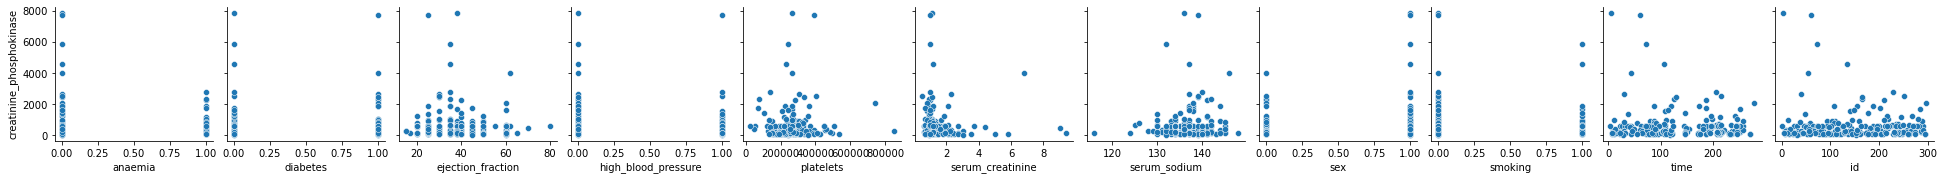

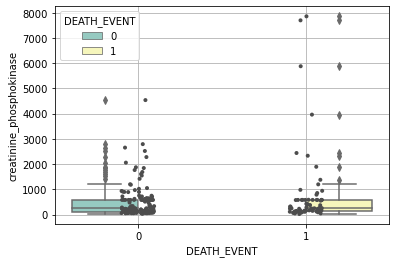

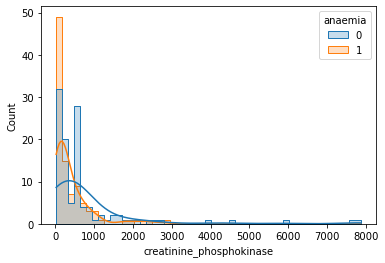

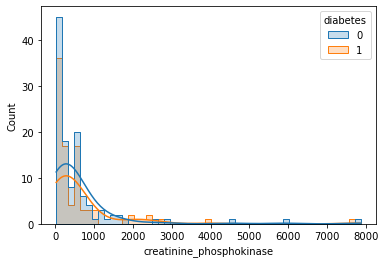

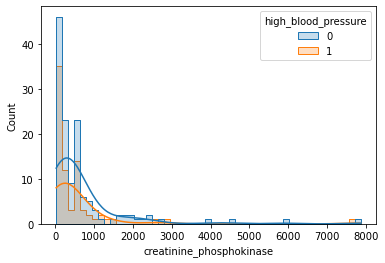

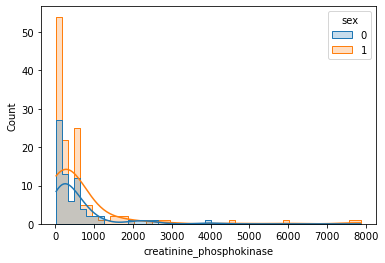

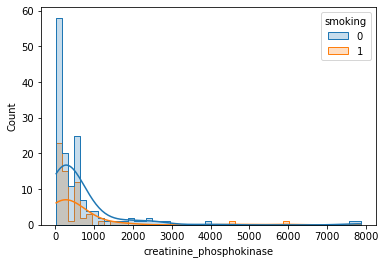

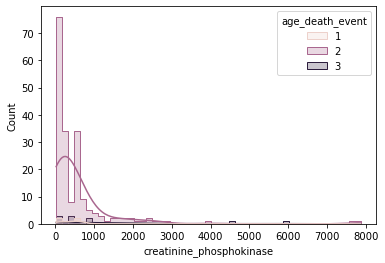

In [13]:
plot_scatter('creatinine_phosphokinase')
# Level of the CPK enzyme in the blood (mcg/L)

In [14]:
#total CPK normal values: 10 to 120 micrograms per liter (mcg/L)
X_train['creat_pho_factor'] = np.nan
X_train['creat_pho_factor'] = np.where((X_train['creatinine_phosphokinase']>=10) & (X_train['creatinine_phosphokinase']<=120) , 1, X_train['creat_pho_factor'])
X_train['creat_pho_factor'] = np.where(np.isnan(X_train['creat_pho_factor']), 0, X_train['creat_pho_factor'])

X_test['creat_pho_factor'] = np.nan
X_test['creat_pho_factor'] = np.where((X_test['creatinine_phosphokinase']>=10) & (X_test['creatinine_phosphokinase']<=120) , 1, X_test['creat_pho_factor'])
X_test['creat_pho_factor'] = np.where(np.isnan(X_test['creat_pho_factor']), 0, X_test['creat_pho_factor'])

## Feature engineering: ejection_fraction

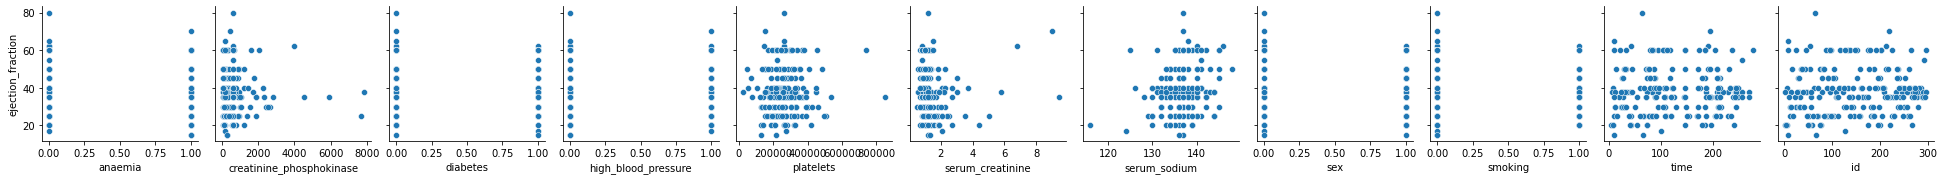

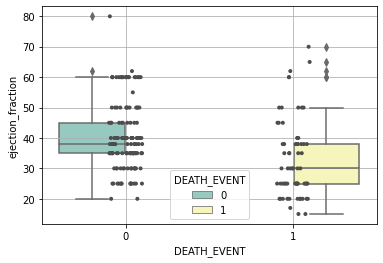

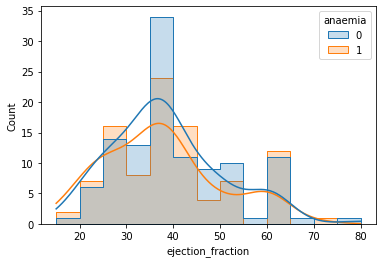

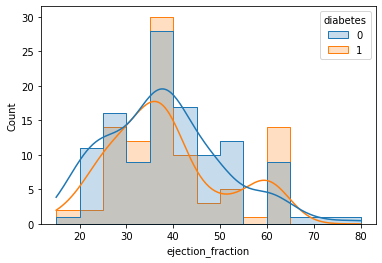

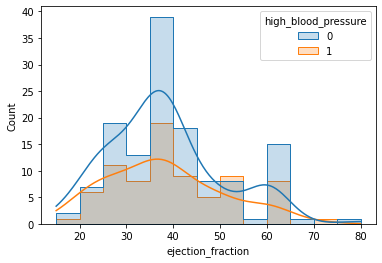

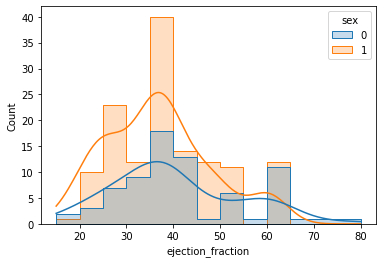

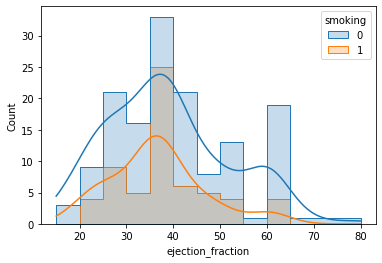

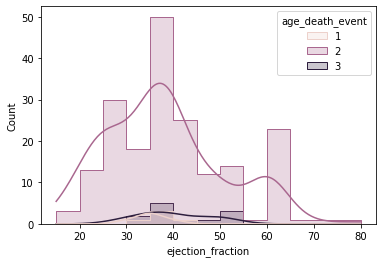

In [15]:
plot_scatter('ejection_fraction')
# Percentage of blood leaving the heart at each contraction (percentage)

<AxesSubplot:>

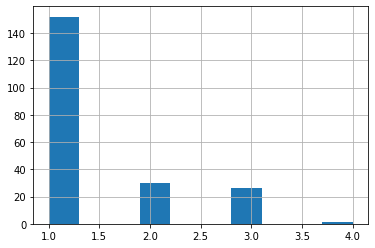

In [16]:
# ejection_fraction = Percentage of blood leaving the heart at each contraction (percentage)

#A ejection fraction measurement under 40 percent may be evidence of heart failure or cardiomyopathy.
#An EF from 41 to 49 percent may be considered “borderline.” It does not always indicate that a person is developing heart failure.
# An ejection fraction measurement higher than 75 percent may indicate a heart condition

X_train['ejection_death_event'] = pd.cut(X_train.ejection_fraction , bins = [0,40,50,75, np.inf], labels = [1,2,3,4])
X_test['ejection_death_event'] = pd.cut(X_test.ejection_fraction , bins = [0,40,50,75, np.inf], labels = [1,2,3,4])

X_train['ejection_death_event'].hist()


## Feature engineering: platelets

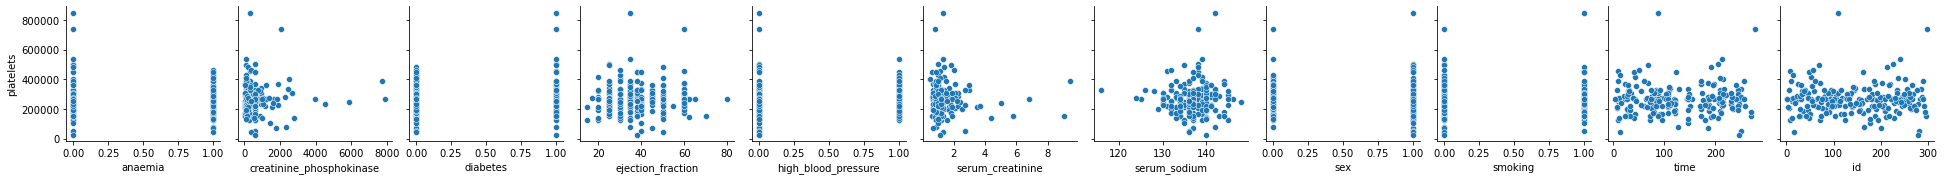

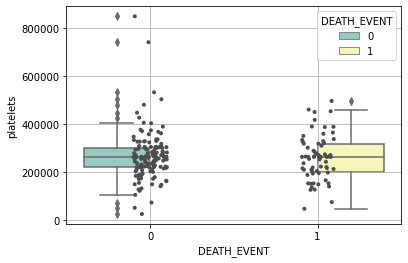

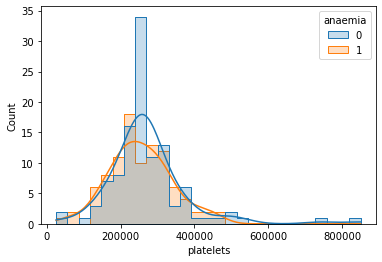

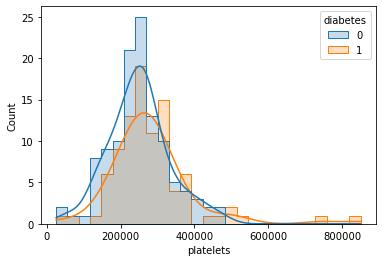

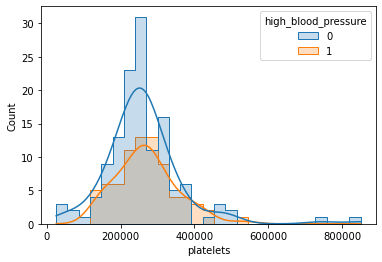

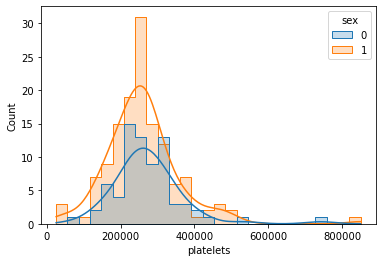

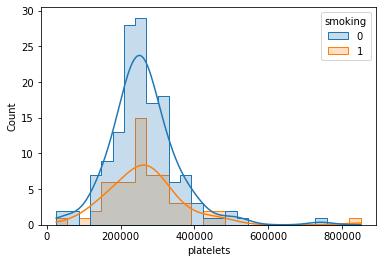

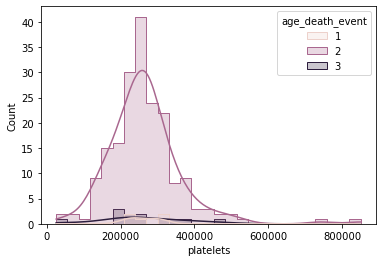

In [17]:
plot_scatter('platelets')
# Platelets in the blood (kiloplatelets/mL)

<AxesSubplot:>

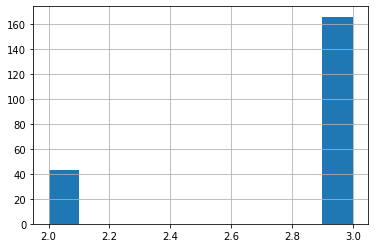

In [18]:
# A normal platelet count is 150,000 to 450,000 platelets per microliter of blood.
# Your risk for bleeding develops if a platelet count falls below 10,000 to 20,000. 
# When the platelet count is less than 50,000, bleeding is likely to be more serious if you're cut or bruised. 
X_train['platelets_death_event'] = pd.cut(X_train.platelets, bins = [0,10000, 200000, 1500000, 4500000, np.inf], labels = [1,2,3,4,5])
X_test['platelets_death_event'] = pd.cut(X_test.platelets, bins = [0,10000, 200000, 1500000, 4500000, np.inf], labels = [1,2,3,4,5])


X_train['platelets_death_event'].hist()

In [19]:
X_train['log_platelets'] = np.log(X_train['platelets'])
X_test['log_platelets'] = np.log(X_test['platelets'])

X_train = X_train.drop('platelets', axis = 1)
X_test = X_test.drop('platelets', axis = 1)

## Feature engineering: serum_sodium 

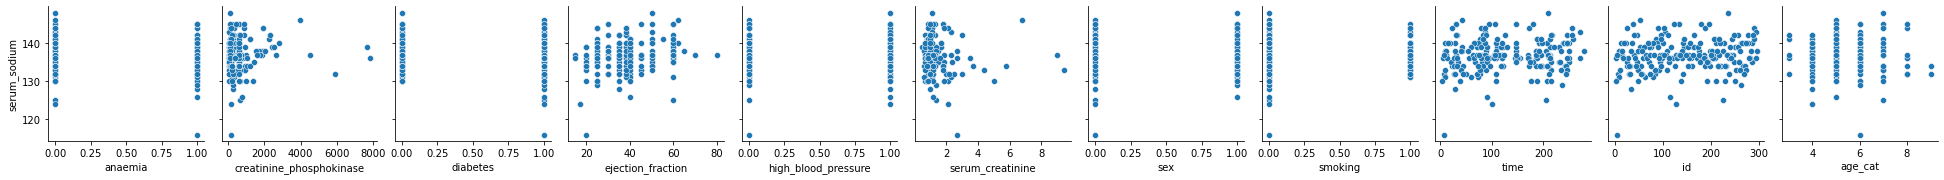

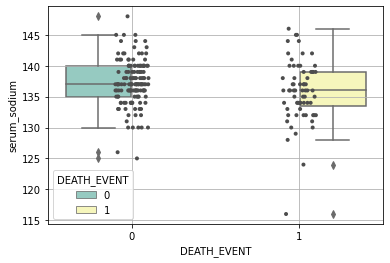

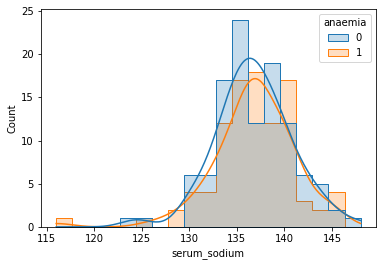

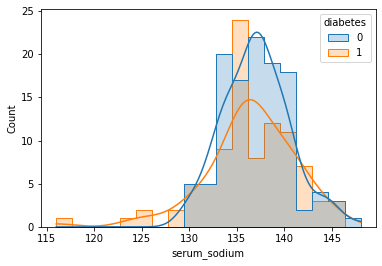

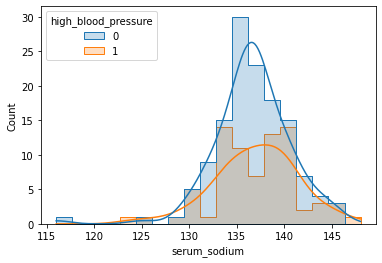

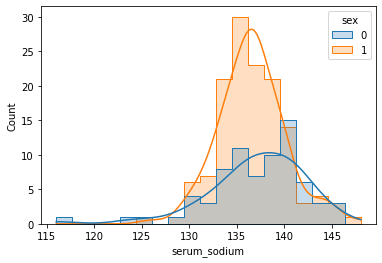

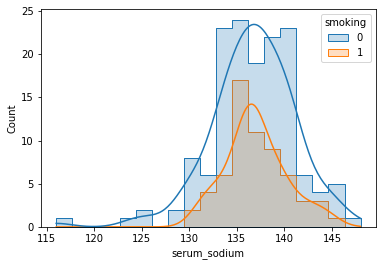

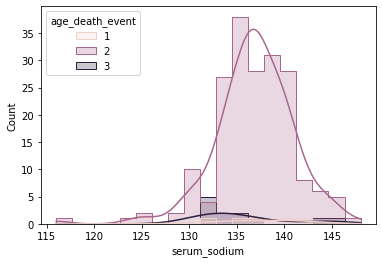

In [20]:
plot_scatter('serum_sodium')
# Level of serum creatinine in the blood (mg/dL)
# 135-147 mmol/L

<AxesSubplot:>

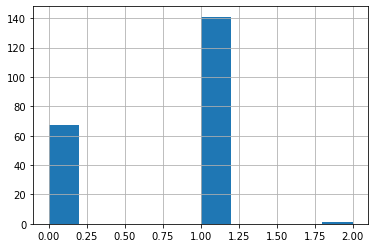

In [21]:
X_train['sodium_death_event'] = pd.cut(X_train.serum_sodium, bins = [0,135, 147,np.inf], labels = [0,1,2])
X_test['sodium_death_event'] = pd.cut(X_test.serum_sodium, bins = [0,135, 147,np.inf], labels = [0,1,2])

X_train['sodium_death_event'].hist()

## Feature engineering:  serum_creatinine

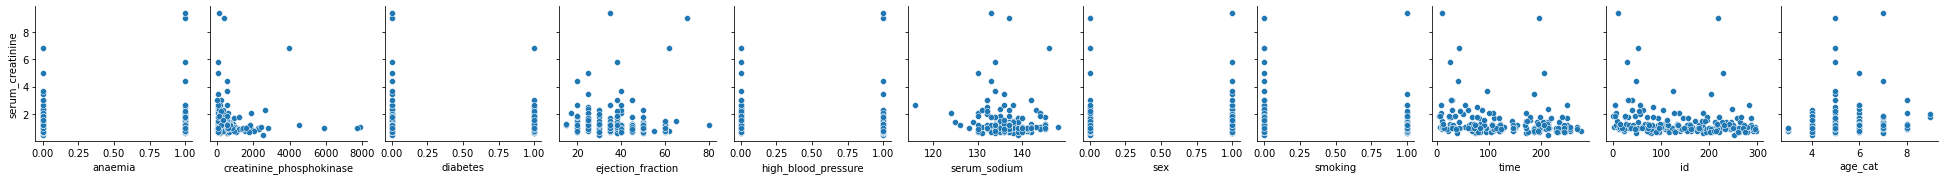

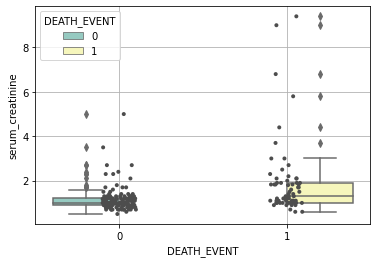

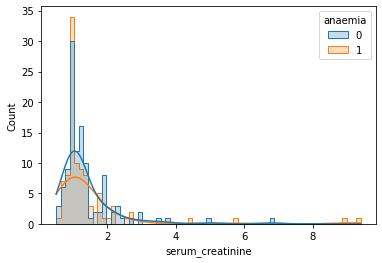

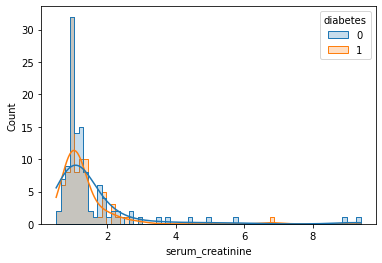

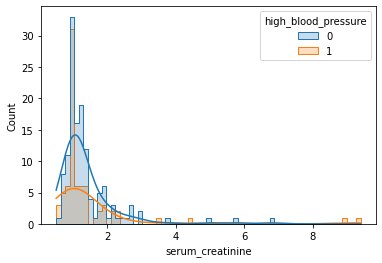

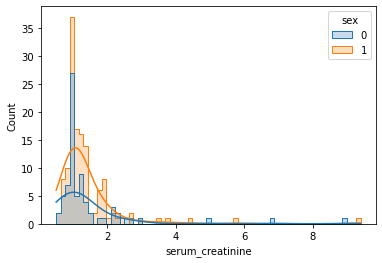

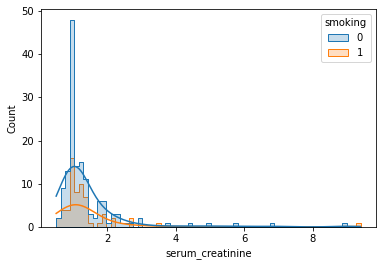

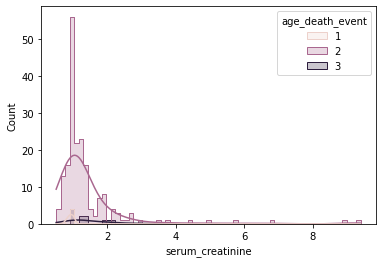

In [22]:
plot_scatter('serum_creatinine')

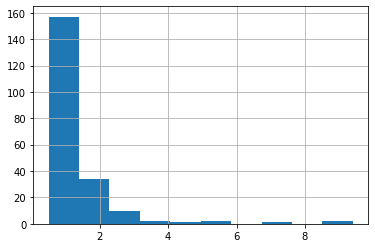

In [23]:
X_train['serum_creatinine'].hist()
X_train['serum_death_event'] = np.nan
X_train['serum_death_event'] = np.where((X_train.serum_creatinine>=0.59) & (X_train.serum_creatinine<=1.35), 0, X_train['serum_death_event'])
X_train['serum_death_event'] = np.where(np.isnan(X_train['serum_death_event']) , 1 , X_train['serum_death_event'])


X_test['serum_death_event'] = np.nan
X_test['serum_death_event'] = np.where((X_test.serum_creatinine>=0.59) & (X_test.serum_creatinine<=1.35), 0, X_test['serum_death_event'])
X_test['serum_death_event'] = np.where(np.isnan(X_test['serum_death_event']) , 1 , X_test['serum_death_event'])

In [24]:
X_train['log_serum'] = np.log(X_train['serum_creatinine'])
X_test['log_serum'] = np.log(X_test['serum_creatinine'])

X_train = X_train.drop('serum_creatinine',axis = 1)
X_test = X_test.drop('serum_creatinine',axis = 1)

## Feature engineering: time

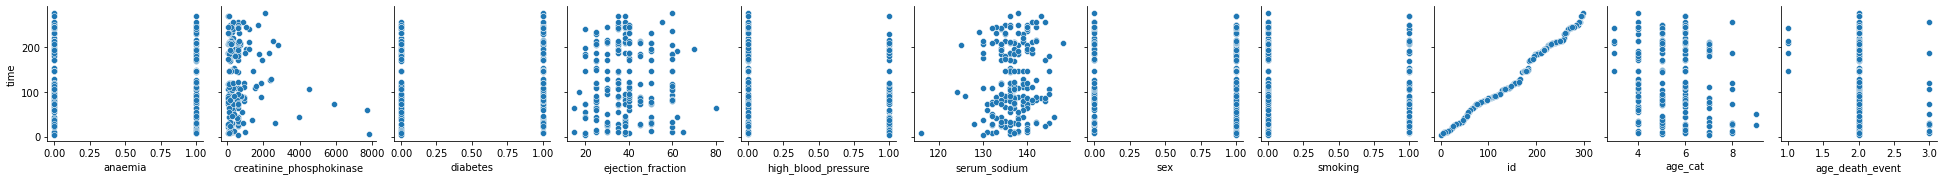

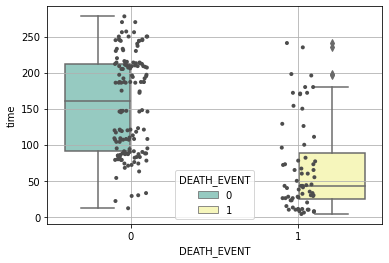

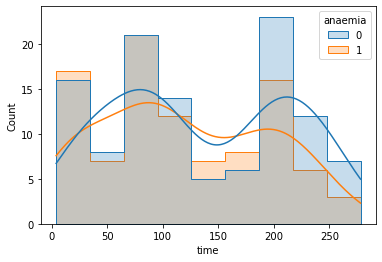

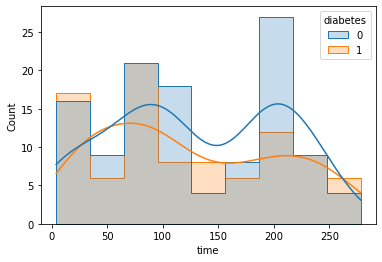

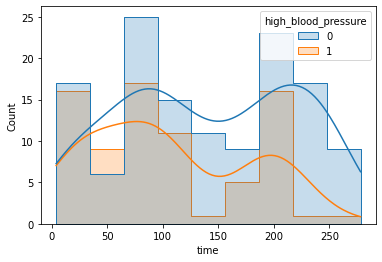

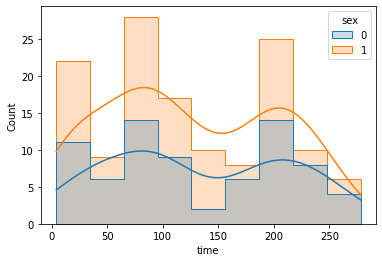

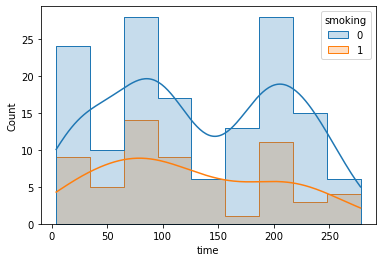

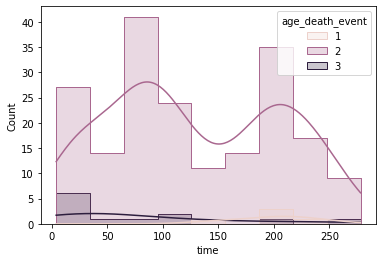

In [25]:
plot_scatter('time')

# There is nothing we can make out of this

In [26]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


# PCA analysis

In [27]:
from sklearn.decomposition import PCA
pca_transformer = PCA(n_components=0.8)
pca_images = pca_transformer.fit_transform(X_train.select_dtypes(['float64', 'int64']))
pca_transformer.explained_variance_ratio_

array([0.98730102])

In [28]:
# We see that PCA analysis is no good

# K-Means

In [29]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='random',n_init=10,
            max_iter=300,tol=1e-04,random_state=0)
y_km_train = km.fit_predict(X_train)
y_km_test = km.fit_predict(X_test)

In [30]:
X_train['k_mean_cluster'] = y_km_train
X_test['k_mean_cluster'] = y_km_test

# Data transformation

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 186 to 112
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   anaemia                   209 non-null    object  
 1   creatinine_phosphokinase  209 non-null    int64   
 2   diabetes                  209 non-null    object  
 3   ejection_fraction         209 non-null    int64   
 4   high_blood_pressure       209 non-null    object  
 5   serum_sodium              209 non-null    int64   
 6   sex                       209 non-null    object  
 7   smoking                   209 non-null    object  
 8   time                      209 non-null    int64   
 9   id                        209 non-null    int64   
 10  age_cat                   209 non-null    category
 11  age_death_event           209 non-null    object  
 12  log_age                   209 non-null    float64 
 13  creat_pho_factor          209 non-null    float6

In [32]:
cat_var = ['age_cat' , 'age_death_event' , 'ejection_death_event' , 'platelets_death_event' , 
           'sodium_death_event','serum_death_event','k_mean_cluster', 'creat_pho_factor']
X_train[cat_var] = X_train[cat_var].astype('object')
X_test[cat_var] = X_test[cat_var].astype('object')

y_train = np.ravel(y_train.astype('int'))
y_test = np.ravel(y_test.astype('int'))

X_train = X_train.loc[: , X_train.columns != 'id']
X_test = X_test.loc[: , X_test.columns != 'id']

In [33]:
X_train_automl = X_train.copy()
X_train_automl['y_train'] = y_train.copy()

## We will now convert our data into CVS files for AutoML

In [34]:
X_train_automl.to_csv('Train_data')
X_test.to_csv('Test_data')

## Since the data is well prepared and cleaned, we will now see how well the results show up using Azure AutoML

In [35]:
from sklearn.metrics import accuracy_score
y_pred_automl = pd.read_csv('AutoMl data/AutoML_Prediction').drop('Unnamed: 0', axis = 1)
accuracy_score(y_test==1, y_pred_automl)

# We see the accuracy from automl is only 0.844
# We will see if we can do better than that.

0.8444444444444444

# Random Forest importance

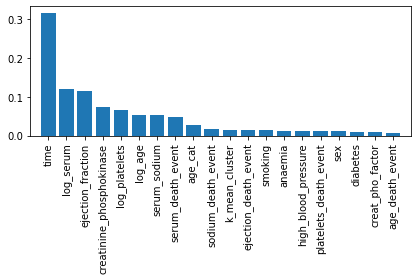

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=1)


feat_labels = X_train.columns

forest.fit(X_train, y_train )
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]


global importances
global indices
global feat_labels

plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])

plt.tight_layout()

# Modelling

In [37]:
# Helper function
from feature_selection import feature_plots

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_train_std=pd.DataFrame(X_train_std)
X_test_std=pd.DataFrame(X_test_std)

X_train_std.columns = X_train.columns
X_test_std.columns = X_test.columns

## Logistic regression

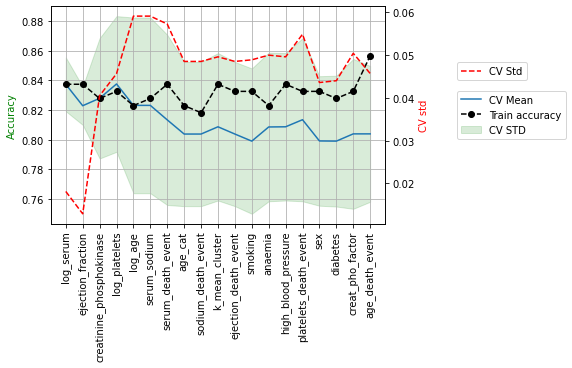

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.1, random_state=1,solver='lbfgs', max_iter=10000)
X_data_train = X_train_std
X_data_test = X_test_std


feature_plots(model, X_data_train, X_data_test, y_train,indices)
# 10

# Random Forest

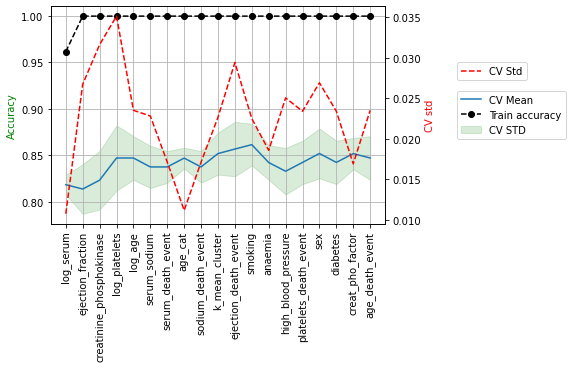

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest =  RandomForestClassifier(criterion='entropy',
                                 n_estimators=100,
                                 random_state=1,
                                 max_features = 'auto',
                                 oob_score = True,
                                 class_weight = 'balanced',
                                 n_jobs=2)
X_data_train = X_train_std
X_data_test = X_test_std
feature_plots(forest, X_data_train, X_data_test, y_train,indices )

# 12

# KNN

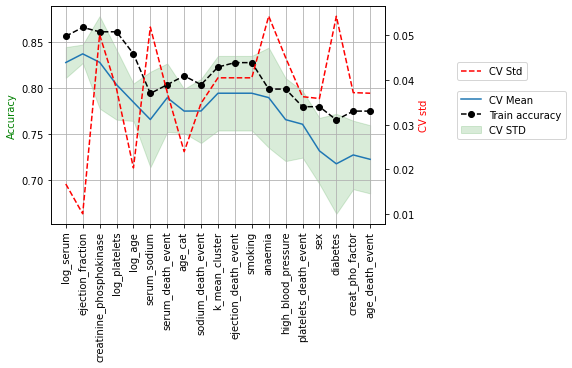

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier(n_neighbors=10, p=2,
                           metric='minkowski')

X_data_train = X_train_std
X_data_test = X_test_std

feature_plots(knn, X_data_train, X_data_test, y_train,indices)

# 10

# Ensemble models

In [42]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier

log_reg = LogisticRegression(C=0.1, random_state=1,solver='lbfgs', max_iter=10000)
rf =  RandomForestClassifier(criterion='entropy',
                                 n_estimators=100,
                                 random_state=1,
                                 max_features = 'auto',
                                 oob_score = True,
                                 class_weight = 'balanced',
                                 n_jobs=2)

knn = KNeighborsClassifier(n_neighbors=10, p=2,
                           metric='minkowski')


def get_stacking():
    level0 = list()
    level0.append(('logistic_reg', log_reg))
    level0.append(('random_forest' , rf))
    level0.append(('knn' , knn))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

def get_voting():
    models = list()
    models.append(('logistic_reg', log_reg))
    models.append(('random_forest' , rf))
    models.append(('knn' , knn))
    ensemble = VotingClassifier(estimators=models, voting='soft')
    return ensemble

def get_models():
    models = dict()
    models['logistic_reg'] = log_reg
    models['random_forest'] = rf
    models['knn'] = knn
    models['voting'] = get_voting()
    models['stacking'] = get_stacking()
    return models






## Ensemble models: Stacking

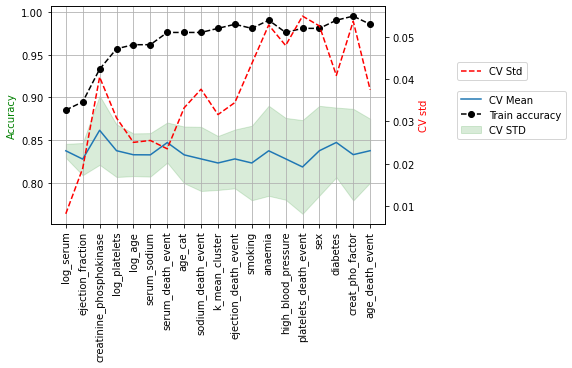

In [43]:
X_data_train = X_train_std
X_data_test = X_test_std

stacking = get_models()['stacking']

feature_plots(stacking, X_data_train, X_data_test, y_train,indices)

# 9

## Ensemble models: Voting

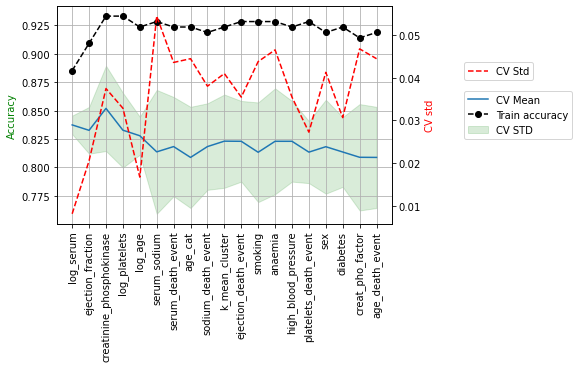

In [44]:
X_data_train = X_train_std
X_data_test = X_test_std

stacking = get_models()['voting']

feature_plots(stacking, X_data_train, X_data_test, y_train,indices)

# 13

# Model comparison

In [45]:
best_feature = [10,12,10, 9, 13]
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
results, names = list(), list()


i=0
for name, model in models.items():
    print(name)
    scores = evaluate_model(model, 
                            X_data_train[feat_labels[indices[0:best_feature[i]]]], 
                            y_train)
    results.append(scores)
    names.append(name)
    i+=1

#plt.grid()
#pyplot.boxplot(results, labels=names, showmeans=True)
#pyplot.show()

logistic_reg
random_forest
knn
voting
stacking


<AxesSubplot:>

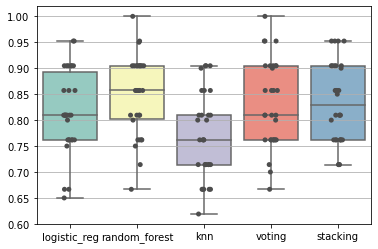

In [46]:
plt.grid()
temp = pd.DataFrame({'name': names, 'result': results})
temp = temp['result'].apply(pd.Series).T
temp.columns = names
temp
sns.boxplot(data = temp, palette="Set3")
sns.stripplot(data = temp, color=".3")

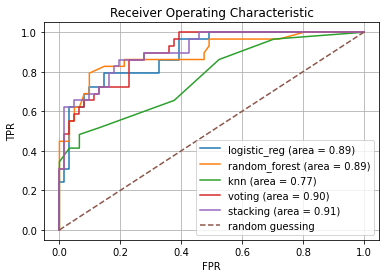

In [49]:
# From the looks of it, random forest seems to do the best here
# so we will use that into our further analysis

from sklearn import metrics
#import scikitplot as skplt
from sklearn.metrics import roc_curve, auc


for i in get_models().keys():
    model = get_models()[i]
    model.fit(X_train, y_train)
    y_pred_prob1 = model.predict_proba(X_test)[:,1]

    fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
    roc_auc = auc(fpr1, tpr1)
    #roc_auc = metrics.roc_auc_score(y_test , y_pred_prob1)
    
    plt.grid()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr1, tpr1, label= '%s (area = %0.2f)' % (i,roc_auc))
plt.plot([0,1] , [0,1], linestyle = '--', label = "random guessing")
plt.legend()

In [50]:
# From the ROC-Curves, we see that it is better to have the stacking model

from sklearn.metrics import confusion_matrix

for i in get_models().keys():

    model = get_models()[i]
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)

    print("############################################################")
    print("Model:", i)
    print(confusion_matrix(y_true = y_test , y_pred = y_pred))

    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score, f1_score

    print('Precision:' , precision_score(y_true = y_test,
                                    y_pred = y_pred))

    print('Recall:' , recall_score(y_true = y_test,
                                    y_pred = y_pred))

    print('F1:' , f1_score(y_true = y_test,
                                    y_pred = y_pred))


############################################################
Model: logistic_reg
[[55  6]
 [12 17]]
Precision: 0.7391304347826086
Recall: 0.5862068965517241
F1: 0.6538461538461539
############################################################
Model: random_forest
[[55  6]
 [ 7 22]]
Precision: 0.7857142857142857
Recall: 0.7586206896551724
F1: 0.7719298245614034
############################################################
Model: knn
[[61  0]
 [23  6]]
Precision: 1.0
Recall: 0.20689655172413793
F1: 0.34285714285714286
############################################################
Model: voting
[[56  5]
 [11 18]]
Precision: 0.782608695652174
Recall: 0.6206896551724138
F1: 0.6923076923076923
############################################################
Model: stacking
[[56  5]
 [10 19]]
Precision: 0.7916666666666666
Recall: 0.6551724137931034
F1: 0.7169811320754716
